# Neural newtorks (Veštačke neuronske mreže)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import files
uploaded = files.upload()



Saving london_weather.csv to london_weather.csv


In [4]:
df = pd.read_csv('london_weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving london_weather.csv to london_weather (1).csv


## Opis karakteristika
| Karakteristika | Opis
| -------- | ------- |
| date | Datum merenja |
| cloud_cover | Oblačnost merena u oktama |
| sunshine | Broj sunčanih sati u danu |
| global_radiation | Zračenje mereno u vatima po metru kvadratnom |
| max_temp  | Maksimalna temperatura u toku dana |
| mean_temp  | Srednja temperatura u toku dana   |
| min_temp |  Minimalna temperatura u toku dana |
| precipitation |  Padavine izražene u milimetrima   |
| pressure | Atmosferski pritisak izražen u Paskalima  |
| snow_depth | Visina snežnog pokrivača u milimetrima   |

In [5]:
df['date'].head()

,date
0,19790101
1,19790102
2,19790103
3,19790104
4,19790105


In [6]:
if not isinstance(df.index, pd.DatetimeIndex):
    df['date']= pd.to_datetime(df['date'],format='%Y%m%d',errors='coerce')
    df = df.set_index("date")


In [7]:
print(f"🗓️ Starting date: {df.index.min().strftime('%Y-%m-%d')}")
print(f"🗓️ Ending date:   {df.index.max().strftime('%Y-%m-%d')}")

🗓️ Starting date: 1979-01-01
🗓️ Ending date:   2020-12-31


In [8]:
df.isna().sum().sort_values(ascending=False)

,0
snow_depth,1441
mean_temp,36
cloud_cover,19
global_radiation,19
max_temp,6
precipitation,6
pressure,4
min_temp,2
sunshine,0


In [9]:
df['snow_depth']=df['snow_depth'].fillna(0) # ukoliko nema podatka, nema ni snega

interp_cols = ['max_temp','min_temp','mean_temp','pressure','global_radiation','cloud_cover',"precipitation"]

df[interp_cols] = (df[interp_cols]
    .interpolate(method='time', limit=3, limit_direction='both')
    .ffill()
    .bfill()
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15341 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15341 non-null  float64
 3   max_temp          15341 non-null  float64
 4   mean_temp         15341 non-null  float64
 5   min_temp          15341 non-null  float64
 6   precipitation     15341 non-null  float64
 7   pressure          15341 non-null  float64
 8   snow_depth        15341 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


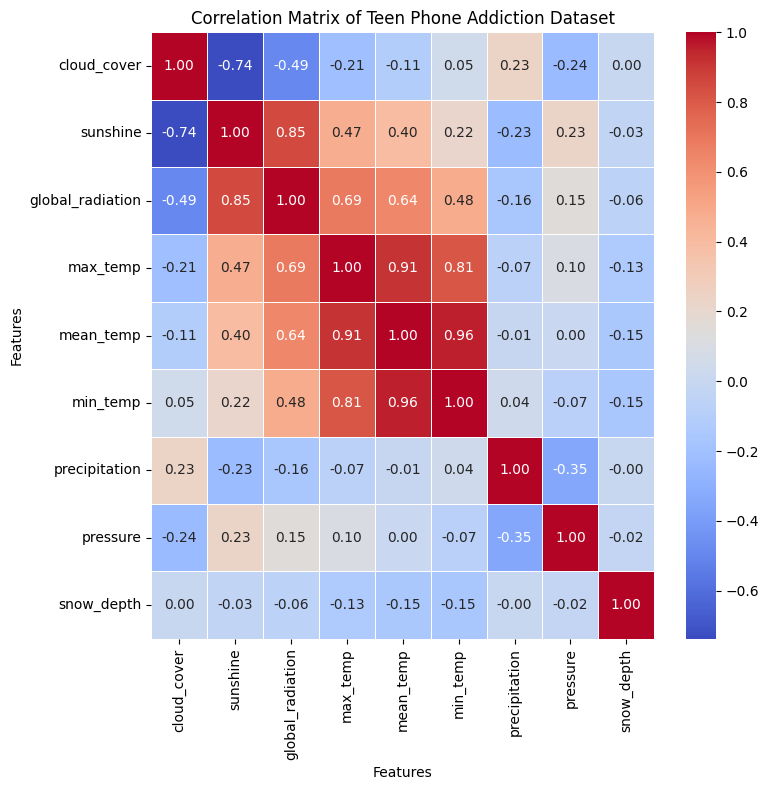

In [11]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

##  Pregled pojedinih karakteristika

Maksimalna, srednja i minimalna temperatura u poslednjih 10 godina

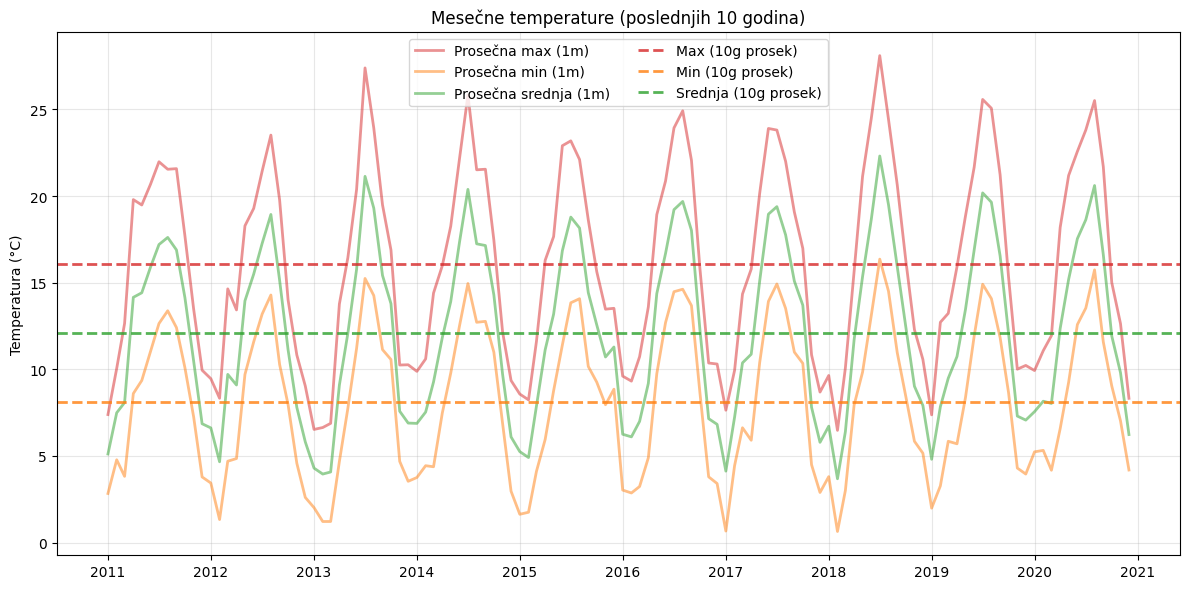

In [12]:
M = df[['max_temp', 'min_temp', 'mean_temp']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)
Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['max_temp'],  alpha=0.5, lw=2, label='Prosečna max (1m)', color='tab:red')
ax.plot(Mw.index, Mw['min_temp'],  alpha=0.5, lw=2, label='Prosečna min (1m)', color='tab:orange')
ax.plot(Mw.index, Mw['mean_temp'], alpha=0.5, lw=2, label='Prosečna srednja (1m)', color='tab:green')

ax.axhline(Mw['max_temp'].mean(),  color='tab:red',   ls='--', lw=2, alpha=0.8, label='Max (10g prosek)')
ax.axhline(Mw['min_temp'].mean(),  color='tab:orange',ls='--', lw=2, alpha=0.8, label='Min (10g prosek)')
ax.axhline(Mw['mean_temp'].mean(), color='tab:green', ls='--', lw=2, alpha=0.8, label='Srednja (10g prosek)')

ax.set_title('Mesečne temperature (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Temperatura (°C)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


Pritisak

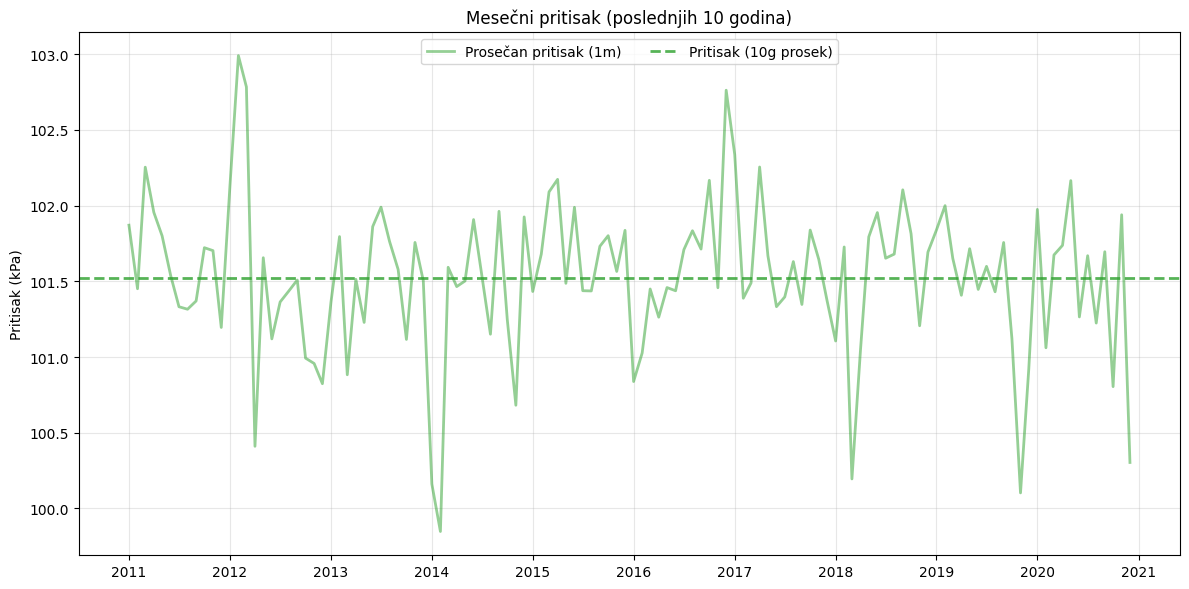

In [13]:
M = df[['pressure']].resample('MS').mean()/1000 # pretvaranje u kPa

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['pressure'],  alpha=0.5, lw=2, label='Prosečan pritisak (1m)', color='tab:green')

ax.axhline(Mw['pressure'].mean(),  color='tab:green',   ls='--', lw=2, alpha=0.8, label='Pritisak (10g prosek)')

ax.set_title('Mesečni pritisak (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Pritisak (kPa)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=3, loc='upper center')
plt.tight_layout()
plt.show()


Padavine

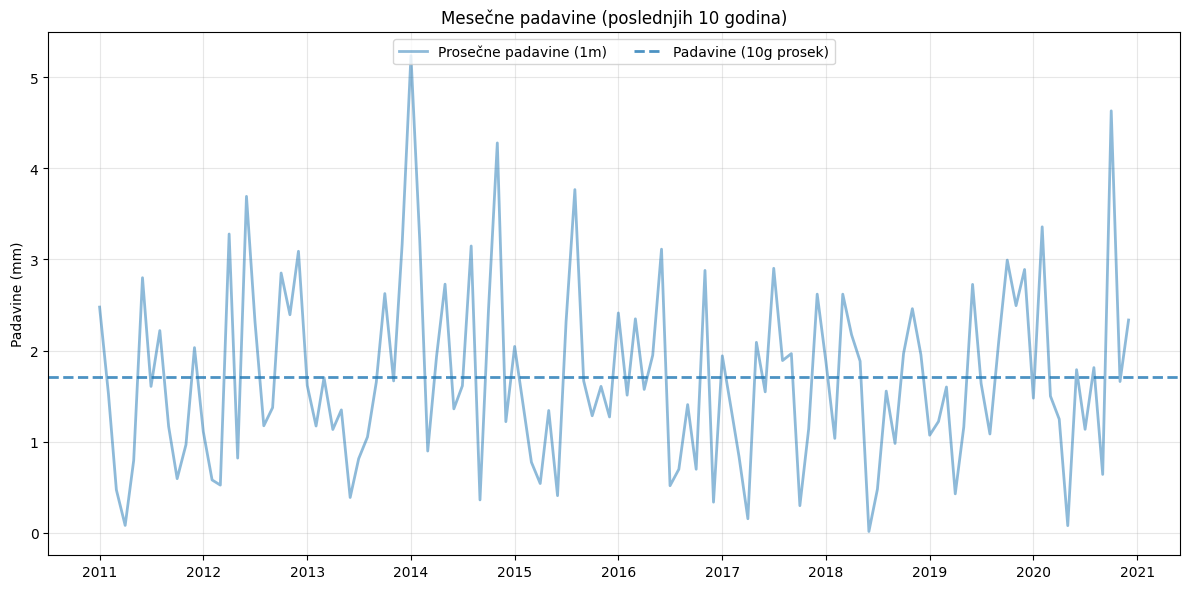

In [14]:
M = df[['precipitation']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['precipitation'],  alpha=0.5, lw=2,label='Prosečne padavine (1m)', color='tab:blue')

ax.axhline(Mw['precipitation'].mean(),  color='tab:blue',   ls='--', lw=2, alpha=0.8, label='Padavine (10g prosek)')

ax.set_title('Mesečne padavine (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Padavine (mm)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


Snežni pokrivač

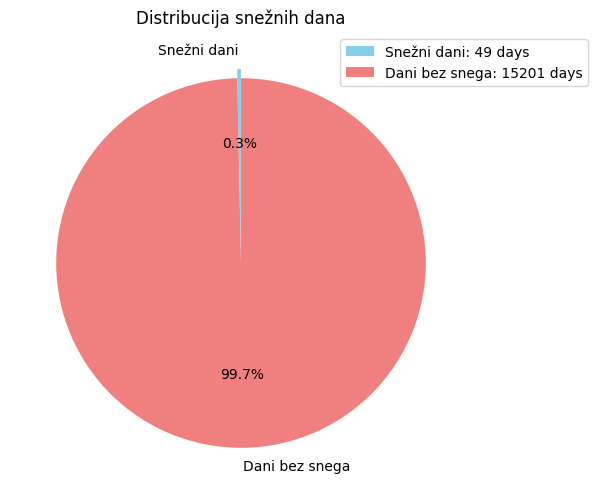

In [15]:
snow_counts = pd.Series({
    "Snežni dani": df['snow_depth'].where(lambda x: x>0).value_counts().values[0],
    "Dani bez snega": df['snow_depth'].where(lambda x: x==0).value_counts().values[0]
})

plt.figure(figsize=(6, 6))
snow_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"],
    explode=(0.05, 0)
)
plt.title("Distribucija snežnih dana")
labels = [f"{cat}: {count} days" for cat, count in snow_counts.items()]
plt.legend(labels,bbox_to_anchor=(0.7, 1))
plt.show()

Radijacija Sunca

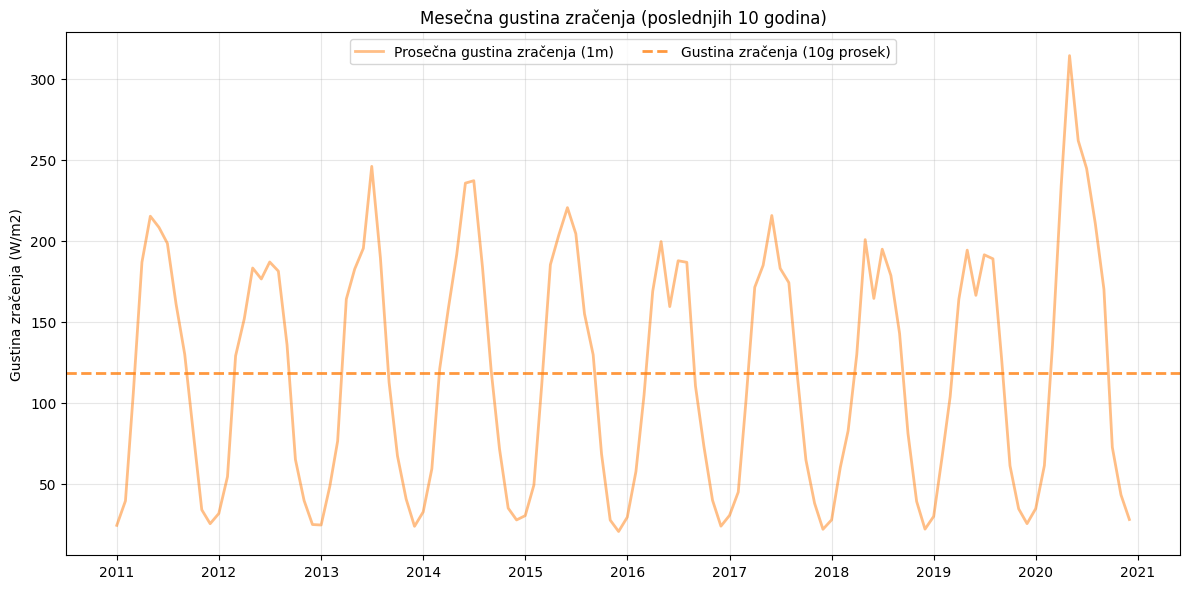

In [16]:
M = df[['global_radiation']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['global_radiation'],  alpha=0.5, lw=2,label='Prosečna gustina zračenja (1m)', color='tab:orange')

ax.axhline(Mw['global_radiation'].mean(),  color='tab:orange',   ls='--', lw=2, alpha=0.8, label='Gustina zračenja (10g prosek)')

ax.set_title('Mesečna gustina zračenja (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Gustina zračenja (W/m2)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


Pokrivenost oblacima

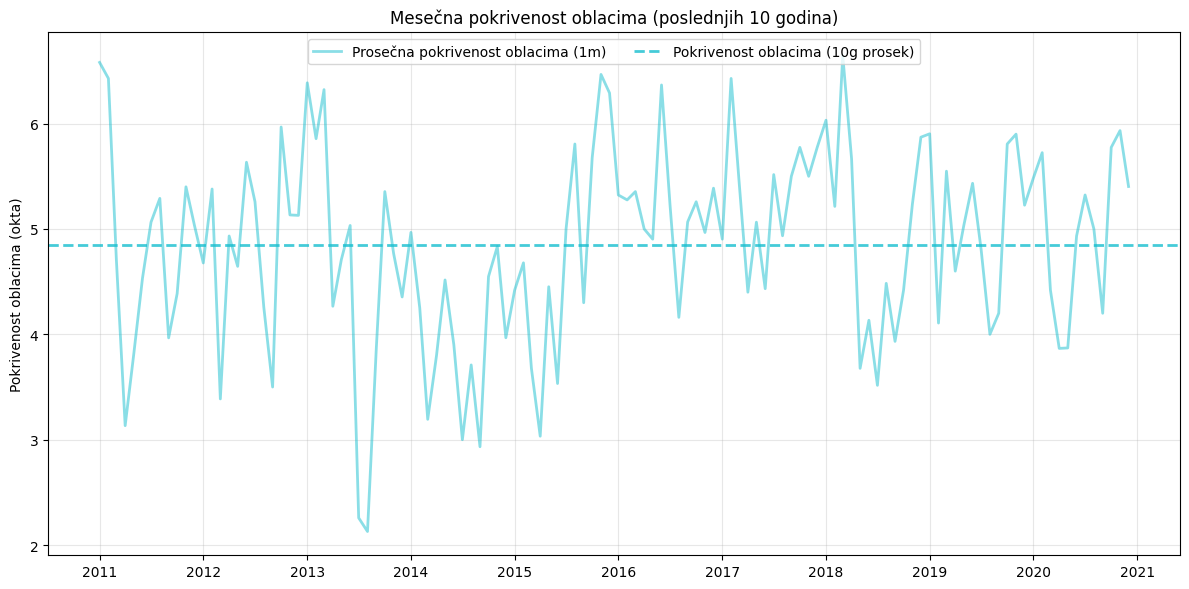

In [17]:
M = df[['cloud_cover']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['cloud_cover'],  alpha=0.5, lw=2,label='Prosečna pokrivenost oblacima (1m)', color='tab:cyan')

ax.axhline(Mw['cloud_cover'].mean(),  color='tab:cyan',   ls='--', lw=2, alpha=0.8, label='Pokrivenost oblacima (10g prosek)')

ax.set_title('Mesečna pokrivenost oblacima (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Pokrivenost oblacima (okta)') # okta: 0-8 skala za pokrivenost oblacima (0=bez oblaka, 8=potpuno oblačno)

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


Osunčanost

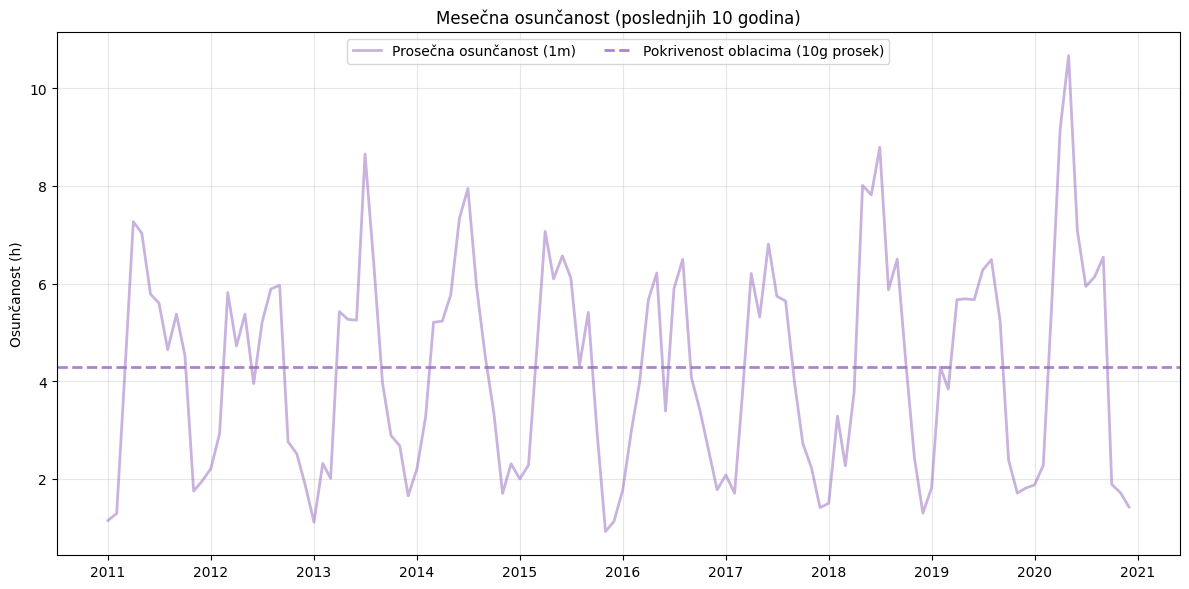

In [18]:
M = df[['sunshine']].resample('MS').mean()

end = M.index.max()
start = (end - pd.DateOffset(years=10)) + pd.DateOffset(months=1)

Mw = M.loc[start:end]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Mw.index, Mw['sunshine'],  alpha=0.5, lw=2,label='Prosečna osunčanost (1m)', color='tab:purple')

ax.axhline(Mw['sunshine'].mean(),  color='tab:purple',   ls='--', lw=2, alpha=0.8, label='Pokrivenost oblacima (10g prosek)')

ax.set_title('Mesečna osunčanost (poslednjih 10 godina)')
ax.set_xlabel(''); ax.set_ylabel('Osunčanost (h)')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc='upper center')
plt.tight_layout()
plt.show()


In [39]:
def evaluate_model(model_to_eval,test_ds_to_eval,x_test,model_version:str):
    test_loss_res, test_rmse_res = model_to_eval.evaluate(test_ds_to_eval,verbose=0)
    print(f"Test loss: {test_loss_res:.5f}\nTest rmse: {test_rmse_res:.5f}")
    y_pred_res = model_to_eval.predict(x_test,verbose=0).ravel()
    metrics_res = eval_metrics(f"{model_version}", y_test, y_pred_res)
    print(metrics_res)
    plot_loss(history,title=f"Loss for {model_version}")
    plot_test(y_test, y_pred_res,pred_label=f"{model_version}")
    return y_pred_res, metrics_res

# Linear regression

                MAE      RMSE        R2
LinearReg  1.109394  1.436280  0.675041
Naive-12   1.415846  1.796517  0.491591
2018-01-01 00:00:00


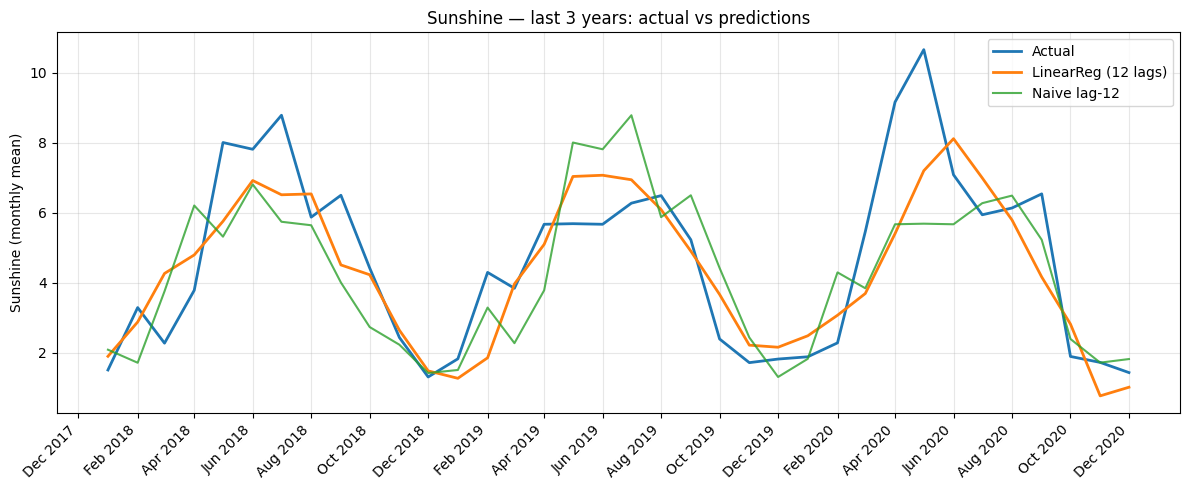

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Monthly sunshine series ---
sun = df['sunshine'].resample('MS').mean()

# --- Create 12 lag features (AR(12)-style linear regression) ---
def make_lags(series, lags=12):
    out = pd.DataFrame({'sunshine': series})
    for k in range(1, lags + 1):
        out[f'lag_{k}'] = series.shift(k)
    return out

data = make_lags(sun, lags=12).dropna()

# --- Define last 3 years test window ---
test_start = pd.Timestamp('2018-01-01')
test_end   = df.index.max()

train = data.loc[data.index < test_start]
test  = data.loc[(data.index >= test_start) & (data.index <= test_end)]

X_train = train.drop(columns='sunshine').values
y_train = train['sunshine'].values
X_test  = test.drop(columns='sunshine').values
y_test  = test['sunshine'].values

# --- Fit linear regression and predict last 3 years ---
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

# Baseline: naive seasonal (same month last year)
y_naive = test['lag_12'].values

# --- Metrics ---
def eval_metrics(y_true, y_hat):
    mae = mean_absolute_error(y_true, y_hat)
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_hat)
    return dict(MAE=mae,RMSE=rmse,R2=r2)

metrics_lr = eval_metrics(y_test, y_pred)
metrics_nv = eval_metrics(y_test, y_naive)

results = {
    "LinearReg": eval_metrics(y_test, y_pred),
    "Naive-12":  eval_metrics(y_test, y_naive),
}

results_df = pd.DataFrame(results).T  # transpose so models are rows
print(results_df)
print(test.index.min())
# --- Plot last 3 years: actual vs predictions ---

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(test.index, y_test,  lw=2, label='Actual')
ax.plot(test.index, y_pred, lw=2, label='LinearReg (12 lags)')
ax.plot(test.index, y_naive, lw=1.5, alpha=0.8, label='Naive lag-12')

ax.set_title('Sunshine — last 3 years: actual vs predictions')
ax.set_ylabel('Sunshine (monthly mean)'); ax.set_xlabel('')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

# Testiranje modela

In [20]:
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R2'])

In [21]:
def make_windows(X, y, lookback):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X[i:i+lookback].values)
        ys.append(y.iloc[i+lookback])
    return np.array(Xs), np.array(ys)

In [22]:
scaller = MinMaxScaler()

features = scaller.fit_transform(df.drop(columns=['sunshine']))
features = pd.DataFrame(features, columns=df.drop(columns=['sunshine']).columns)

target = df['sunshine']
features.index=df.index
target.index=df.index

In [23]:
def make_split(X,y,lookback):
    # Index for each window = end of window
    win_index = features.index[lookback:]  # DatetimeIndex length == len(X)

    # Choose boundaries
    train_end_date = pd.Timestamp("2015-01-01")
    val_end_date   = pd.Timestamp("2018-01-01")

    # Masks over windows
    train_mask = win_index <= train_end_date
    val_mask   = (win_index > train_end_date) & (win_index <= val_end_date)
    test_mask  = win_index > val_end_date

    X_train, y_train = X[train_mask], y[train_mask]
    X_val,   y_val   = X[val_mask],   y[val_mask]
    X_test,  y_test  = X[test_mask],  y[test_mask]
    return X_train,y_train,X_val,y_val,X_test,y_test


def plot_loss(history):
    # --- Training and validation loss ---
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.title("Loss over epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(history):
    # --- Training and validation loss ---
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.title("Loss over epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Binary Crossentropy Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_test(y_test,y_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label="Actual", color="blue", linewidth=2)
    plt.plot(y_pred, label="Predicted", color="orange", linewidth=2, alpha=0.7)
    plt.title("Actual vs Predicted Values on Test Set")
    plt.xlabel("Samples")
    plt.ylabel("Sunshine")
    plt.legend()
    plt.grid(True)
    plt.show()


In [24]:
X, y = make_windows(features, target, 30)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y,30)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test {X_test.shape}, y_test: {y_test.shape}")


X_train: (13120, 30, 8), y_train: (13120,)
X_val: (1096, 30, 8), y_val: (1096,)
X_test (1095, 30, 8), y_test: (1095,)


## LSTM

In [25]:
# --- Windowing function ---
LOOKBACK = 7  # past 30 days

X, y = make_windows(features, target, LOOKBACK)
print("X shape:", X.shape)  # (num_samples, lookback, num_features)
print("y shape:", y.shape)  # (num_samples,)

X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y,LOOKBACK)

# --- Dataset pipeline ---
BATCH = 256

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(128).batch(BATCH).prefetch(2)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(2)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

# --- Build LSTM classifier ---
F = X.shape[-1]  # number of features
model = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(32,return_sequences=False),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)  # binary classification
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()

# --- Train ---
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
    ]
)


X shape: (15334, 7, 8)
y shape: (15334,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 64)          │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 32)             │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,257 (126.00 KB)

 Trainable params: 32,257 (126.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 20.2864 - root_mean_squared_error: 4.4895 - val_loss: 11.8628 - val_root_mean_squared_error: 3.4442 - learning_rate: 0.0010
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 13.6443 - root_mean_squared_error: 3.6931 - val_loss: 11.6730 - val_root_mean_squared_error: 3.4166 - learning_rate: 0.0010
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 13.1861 - root_mean_squared_error: 3.6306 - val_loss: 11.5455 - val_root_mean_squared_error: 3.3979 - learning_rate: 0.0010
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 12.9650 - root_mean_squared_error: 3.5999 - val_loss: 11.3672 - val_root_mean_squared_error: 3.3715 - learning_rate: 0.0010
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 12.7738 - root_mean_squared_error: 3.5737 - val_loss: 11.2356 - val_root_mean_squared_error: 3.3519 - learning_rate: 0.0010
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 12.6238 - root_mean_square

['loss', 'compile_metrics']
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.1462 - root_mean_squared_error: 3.1814


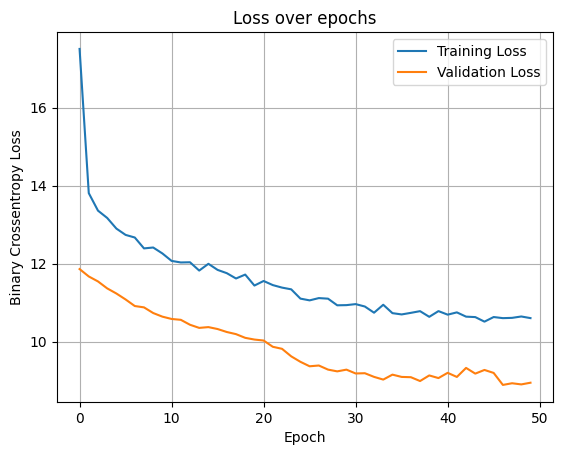

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
(1095,) (1095,) (36, 13)


In [27]:
print(model.metrics_names)
test_loss, test_rmse = model.evaluate(test_ds)

plot_loss(history)

y_pred = model.predict(X_test).ravel()

print(y_test.shape, y_pred.shape,test.shape)


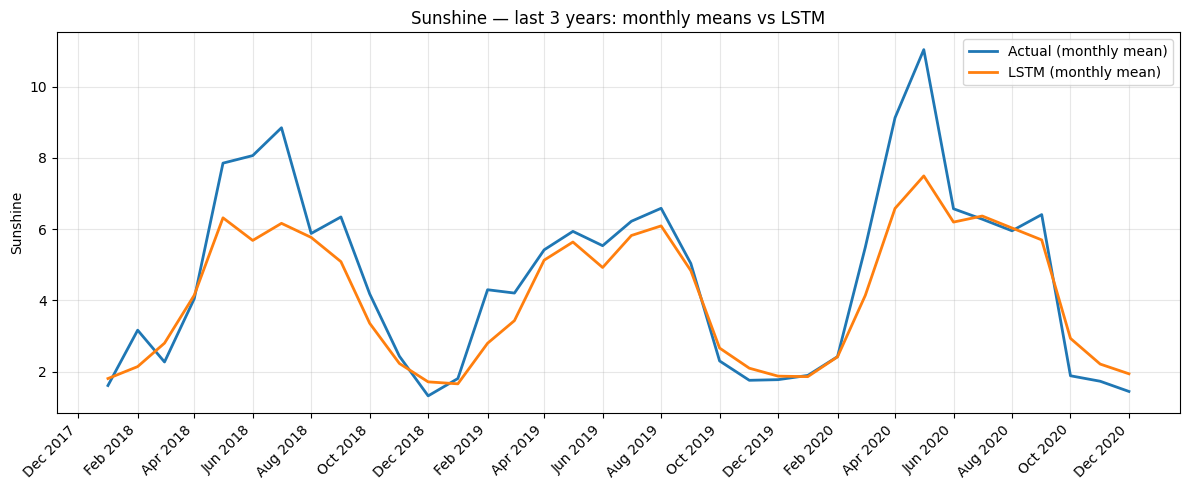

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# y_test and y_pred are numpy arrays (length 1095, daily from 2018-01-01)
idx = pd.date_range("2018-01-01", periods=1095, freq="D")

df = pd.DataFrame({
    "Actual": y_test,
    "LSTM": y_pred
}, index=idx)

# --- Convert to monthly averages (Month Start) ---
df_monthly = df.resample("MS").mean()

# --- Plot ---
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_monthly.index, df_monthly["Actual"], lw=2, label="Actual (monthly mean)")
ax.plot(df_monthly.index, df_monthly["LSTM"], lw=2, label="LSTM (monthly mean)")

# optional smoothed curves

ax.set_title("Sunshine — last 3 years: monthly means vs LSTM")
ax.set_ylabel("Sunshine"); ax.set_xlabel("")

# ticks: show each January
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


ADAMAX

In [32]:
LOOKBACK = 14
X, y = make_windows(features, target, LOOKBACK)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)

BATCH = 256

# --- Build datasets ---
train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(128)
    .batch(BATCH)
    .prefetch(2)
)
val_ds = (
    tf.data.Dataset.from_tensor_slices((X_val, y_val))
    .batch(BATCH)
    .prefetch(2)
)
test_ds = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test))
    .batch(BATCH)
    .prefetch(2)
)

F = X.shape[-1]

# --- LSTM model ---
model_lstm_v2 = keras.Sequential(
    [
        keras.layers.Input(shape=(LOOKBACK, F)),
        keras.layers.LSTM(32, return_sequences=True),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(16, return_sequences=False),
        keras.layers.Dense(1),
    ]
)

# --- OPTIMIZATOR: Adamax ---
model_lstm_v2.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=1e-3),  # obično veći LR nego kod Adam
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_lstm_v2.summary()

# --- Train model ---
history = model_lstm_v2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 14, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,401 (32.82 KB)

 Trainable params: 8,401 (32.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 6s - 110ms/step - loss: 28.8874 - root_mean_squared_error: 5.3747 - val_loss: 18.3029 - val_root_mean_squared_error: 4.2782 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 1s - 25ms/step - loss: 18.5352 - root_mean_squared_error: 4.3052 - val_loss: 14.7017 - val_root_mean_squared_error: 3.8343 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 1s - 22ms/step - loss: 16.5458 - root_mean_squared_error: 4.0677 - val_loss: 14.3826 - val_root_mean_squared_error: 3.7924 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 1s - 22ms/step - loss: 16.2240 - root_mean_squared_error: 4.0279 - val_loss: 14.3735 - val_root_mean_squared_error: 3.7912 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 1s - 24ms/step - loss: 16.1187 - root_mean_squared_error: 4.0148 - val_loss: 14.3516 - val_root_mean_squared_error: 3.7883 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 1s - 22ms/step - loss: 15.9828 - root_mean_squared_error: 3.9978 - val_loss: 14.1470 - val_root_mean_squared_error: 3.7613 -

NADAM

In [46]:

from tensorflow import keras
import tensorflow as tf

LOOKBACK = 14
X, y = make_windows(features, target, LOOKBACK)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)

BATCH = 256

# --- Build datasets ---
train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(128)
    .batch(BATCH)
    .prefetch(2)
)
val_ds = (
    tf.data.Dataset.from_tensor_slices((X_val, y_val))
    .batch(BATCH)
    .prefetch(2)
)
test_ds = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test))
    .batch(BATCH)
    .prefetch(2)
)

F = X.shape[-1]

# --- LSTM model ---
model_lstm_nadam = keras.Sequential(
    [
        keras.layers.Input(shape=(LOOKBACK, F)),
        keras.layers.LSTM(32, return_sequences=True),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(16, return_sequences=False),
        keras.layers.Dense(1),
    ]
)

# --- OPTIMIZATOR: Nadam ---
model_lstm_nadam.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=1e-4),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_lstm_nadam.summary()

# --- Train model ---
history_nadam = model_lstm_nadam.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)





Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 14, 32)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,401 (32.82 KB)

 Trainable params: 8,401 (32.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 8s - 146ms/step - loss: 34.3801 - root_mean_squared_error: 5.8635 - val_loss: 28.7009 - val_root_mean_squared_error: 5.3573 - learning_rate: 1.0000e-04
Epoch 2/100
52/52 - 1s - 22ms/step - loss: 31.3158 - root_mean_squared_error: 5.5961 - val_loss: 25.5912 - val_root_mean_squared_error: 5.0588 - learning_rate: 1.0000e-04
Epoch 3/100
52/52 - 1s - 25ms/step - loss: 27.3923 - root_mean_squared_error: 5.2338 - val_loss: 21.3353 - val_root_mean_squared_error: 4.6190 - learning_rate: 1.0000e-04
Epoch 4/100
52/52 - 1s - 24ms/step - loss: 22.3078 - root_mean_squared_error: 4.7231 - val_loss: 16.8845 - val_root_mean_squared_error: 4.1091 - learning_rate: 1.0000e-04
Epoch 5/100
52/52 - 1s - 22ms/step - loss: 18.2856 - root_mean_squared_error: 4.2762 - val_loss: 14.7723 - val_root_mean_squared_error: 3.8435 - learning_rate: 1.0000e-04
Epoch 6/100
52/52 - 1s - 24ms/step - loss: 16.5991 - root_mean_squared_error: 4.0742 - val_loss: 14.2541 - val_root_mean_squared_error: 3.7755 -

## GRU

In [29]:
# --- Windowing function ---
LOOKBACK = 7  # past 30 days

X, y = make_windows(features, target, LOOKBACK)
print("X shape:", X.shape)  # (num_samples, lookback, num_features)
print("y shape:", y.shape)  # (num_samples,)

X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)

# --- Dataset pipeline ---
BATCH = 256

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(128).batch(BATCH).prefetch(2)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(2)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

# --- Build GRU classifier ---
F = X.shape[-1]  # number of features
model_gru = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.GRU(64, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.GRU(32, return_sequences=False),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)  # binary classification
])

model_gru.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model_gru.summary()

# --- Train GRU ---
history_gru = model_gru.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
    ]
)


X shape: (15334, 7, 8)
y shape: (15334,)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 7, 64)          │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 32)             │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,769 (96.75 KB)

 Trainable params: 24,769 (96.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - loss: 17.5016 - root_mean_squared_error: 4.1785 - val_loss: 11.4920 - val_root_mean_squared_error: 3.3900 - learning_rate: 0.0010
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 12.9848 - root_mean_squared_error: 3.6029 - val_loss: 11.2311 - val_root_mean_squared_error: 3.3513 - learning_rate: 0.0010
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 12.3948 - root_mean_squared_error: 3.5198 - val_loss: 11.0325 - val_root_mean_squared_error: 3.3215 - learning_rate: 0.0010
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 12.1495 - root_mean_squared_error: 3.4851 - val_loss: 10.9685 - val_root_mean_squared_error: 3.3119 - learning_rate: 0.0010
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 11.9970 - root_mean_squared_error: 3.4632 - val_loss: 10.7180 - val_root_mean_squared_error: 3.2738 - learning_rate: 0.0010
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 11.7071 - root_mean_squa

['loss', 'compile_metrics']
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.6962 - root_mean_squared_error: 3.1101 


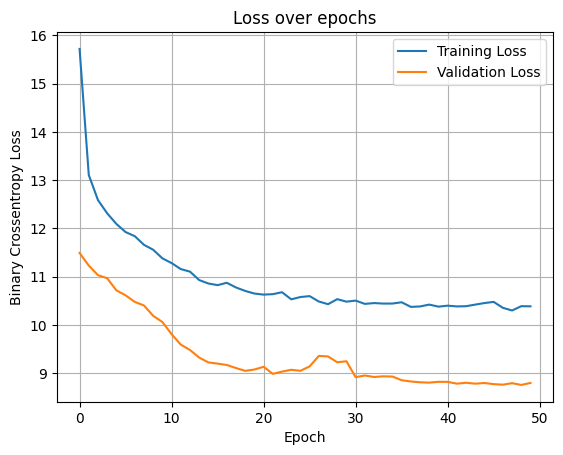

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
(1095,) (1095,) (1095, 7, 8)


In [30]:

print(model_gru.metrics_names)

test_loss, test_rmse = model_gru.evaluate(test_ds)

plot_loss(history_gru)


y_pred = np.concatenate([model_gru.predict(batch_x).ravel() for batch_x, _ in test_ds])


print(y_test.shape, y_pred.shape, X_test.shape)


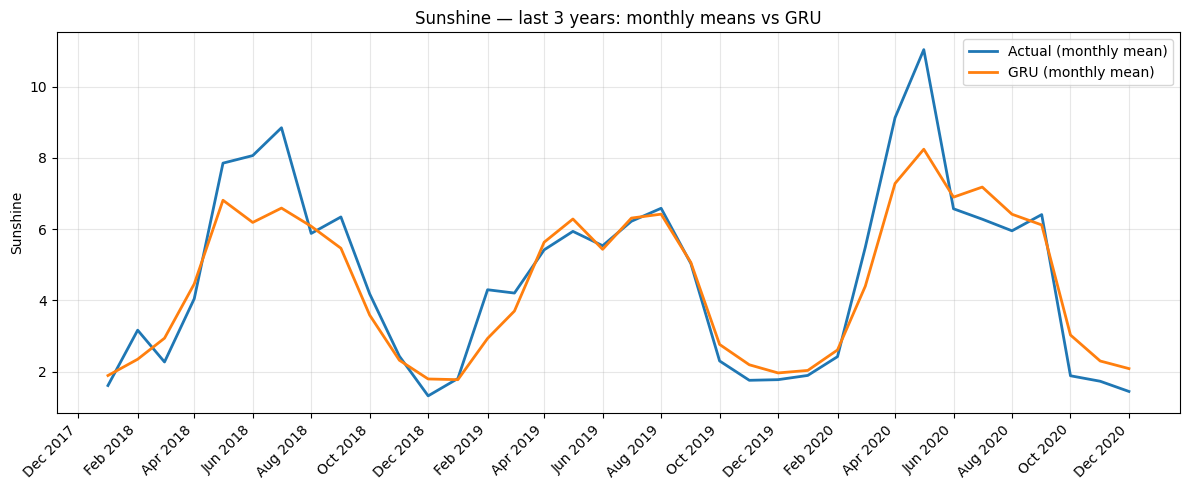

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# y_test and y_pred_gru are numpy arrays (length 1095, daily from 2018-01-01)
idx = pd.date_range("2018-01-01", periods=1095, freq="D")

df = pd.DataFrame({
    "Actual": y_test,
    "GRU": y_pred  # y_pred from GRU model
}, index=idx)

# --- Convert to monthly averages (Month Start) ---
df_monthly = df.resample("MS").mean()

# --- Plot ---
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_monthly.index, df_monthly["Actual"], lw=2, label="Actual (monthly mean)")
ax.plot(df_monthly.index, df_monthly["GRU"], lw=2, label="GRU (monthly mean)")

ax.set_title("Sunshine — last 3 years: monthly means vs GRU")
ax.set_ylabel("Sunshine")
ax.set_xlabel("")

# ticks: show every 2 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


ADAMAX

In [35]:
LOOKBACK = 14
X, y = make_windows(features, target, LOOKBACK)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y, LOOKBACK)

BATCH = 256

# --- Build datasets ---
train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(128)
    .batch(BATCH)
    .prefetch(2)
)
val_ds = (
    tf.data.Dataset.from_tensor_slices((X_val, y_val))
    .batch(BATCH)
    .prefetch(2)
)
test_ds = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test))
    .batch(BATCH)
    .prefetch(2)
)

F = X.shape[-1]

# --- GRU model ---
model_gru_v2 = keras.Sequential(
    [
        keras.layers.Input(shape=(LOOKBACK, F)),
        keras.layers.GRU(32, return_sequences=True),
        keras.layers.Dropout(0.2),
        keras.layers.GRU(16, return_sequences=False),
        keras.layers.Dense(1),
    ]
)

# --- OPTIMIZATOR: Adamax ---
model_gru_v2.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()],
)

model_gru_v2.summary()

# --- Train model ---
history = model_gru_v2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5
        ),
    ],
    verbose=2,
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 14, 32)         │         4,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,449 (25.19 KB)

 Trainable params: 6,449 (25.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 12s - 232ms/step - loss: 27.3313 - root_mean_squared_error: 5.2279 - val_loss: 15.3939 - val_root_mean_squared_error: 3.9235 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 1s - 27ms/step - loss: 16.2609 - root_mean_squared_error: 4.0325 - val_loss: 14.1941 - val_root_mean_squared_error: 3.7675 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 1s - 27ms/step - loss: 15.6997 - root_mean_squared_error: 3.9623 - val_loss: 13.9476 - val_root_mean_squared_error: 3.7347 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 3s - 50ms/step - loss: 15.4055 - root_mean_squared_error: 3.9250 - val_loss: 13.6578 - val_root_mean_squared_error: 3.6957 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 3s - 52ms/step - loss: 14.9906 - root_mean_squared_error: 3.8718 - val_loss: 13.1909 - val_root_mean_squared_error: 3.6319 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 3s - 50ms/step - loss: 14.3299 - root_mean_squared_error: 3.7855 - val_loss: 12.4166 - val_root_mean_squared_error: 3.5237 

SIMPLE RNN

In [ ]:
from tensorflow import keras
import tensorflow as tf

# --- Build Simple RNN classifier ---
F = X.shape[-1]  # number of features
model_rnn = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.SimpleRNN(64, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.SimpleRNN(32, return_sequences=False),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)  # binary classification
])

# Compile model
model_rnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()]
)

model_rnn.summary()

# --- Train Simple RNN ---
history_rnn = model_rnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
    ]
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 7, 64)          │         4,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ (None, 32)             │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,929 (34.88 KB)

 Trainable params: 8,929 (34.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 25.7090 - root_mean_squared_error: 5.0356 - val_loss: 12.2457 - val_root_mean_squared_error: 3.4994 - learning_rate: 0.0010
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.9697 - root_mean_squared_error: 3.7369 - val_loss: 11.5552 - val_root_mean_squared_error: 3.3993 - learning_rate: 0.0010
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.0553 - root_mean_squared_error: 3.6126 - val_loss: 11.1231 - val_root_mean_squared_error: 3.3351 - learning_rate: 0.0010
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.7535 - root_mean_squared_error: 3.5707 - val_loss: 11.0236 - val_root_mean_squared_error: 3.3202 - learning_rate: 0.0010
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.3585 - root_mean_squared_error: 3.5148 - val_loss: 10.8394 - val_root_mean_squared_error: 3.2923 - learning_rate: 0.0010
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 12.1344 - root_mean_squared_er

['loss', 'compile_metrics']
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4704 - root_mean_squared_error: 3.0751 


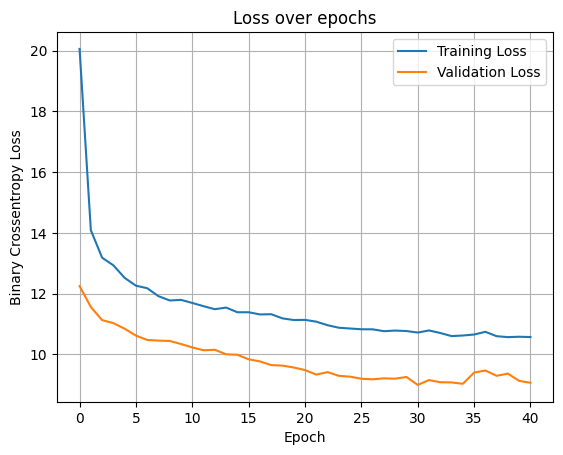

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
(1095,) (1095,) (1095, 7, 8)


In [ ]:

print(model_rnn.metrics_names)
test_loss, test_rmse = model_rnn.evaluate(test_ds)

plot_loss(history_rnn)

y_pred = np.concatenate([model_rnn.predict(x).ravel() for x, _ in test_ds])

print(y_test.shape, y_pred.shape, X_test.shape)


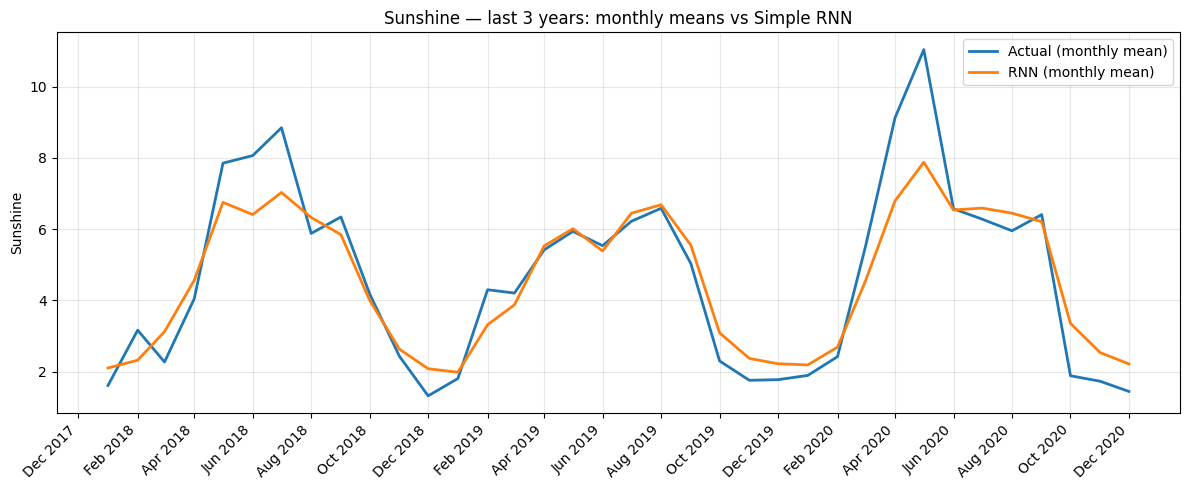

In [ ]:

# y_test and y_pred_rnn are numpy arrays (length 1095, daily from 2018-01-01)
idx = pd.date_range("2018-01-01", periods=1095, freq="D")

df = pd.DataFrame({
    "Actual": y_test,
    "RNN": y_pred  # y_pred from Simple RNN model
}, index=idx)

# --- Convert to monthly averages (Month Start) ---
df_monthly = df.resample("MS").mean()

# --- Plot ---
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_monthly.index, df_monthly["Actual"], lw=2, label="Actual (monthly mean)")
ax.plot(df_monthly.index, df_monthly["RNN"], lw=2, label="RNN (monthly mean)")

ax.set_title("Sunshine — last 3 years: monthly means vs Simple RNN")
ax.set_ylabel("Sunshine")
ax.set_xlabel("")

# ticks: show every 2 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


POREDJENJE LSTM, GRU, SIMPLE RNN

In [ ]:

gru_loss, gru_rmse = model_gru.evaluate(test_ds, verbose=0)

lstm_loss, lstm_rmse = model.evaluate(test_ds, verbose=0)

rnn_loss, rnn_rmse = model_rnn.evaluate(test_ds, verbose=0)

print(f"Test RMSE:\nGRU: {gru_rmse:.4f}\nLSTM: {lstm_rmse:.4f}\nSimple RNN: {rnn_rmse:.4f}")


Test RMSE:
GRU: 3.0228
LSTM: 3.0248
Simple RNN: 2.9728


In [ ]:


y_pred_gru = np.concatenate([model_gru.predict(x).ravel() for x, _ in test_ds])
y_pred_lstm = np.concatenate([model.predict(x).ravel() for x, _ in test_ds])
y_pred_rnn = np.concatenate([model_rnn.predict(x).ravel() for x, _ in test_ds])


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


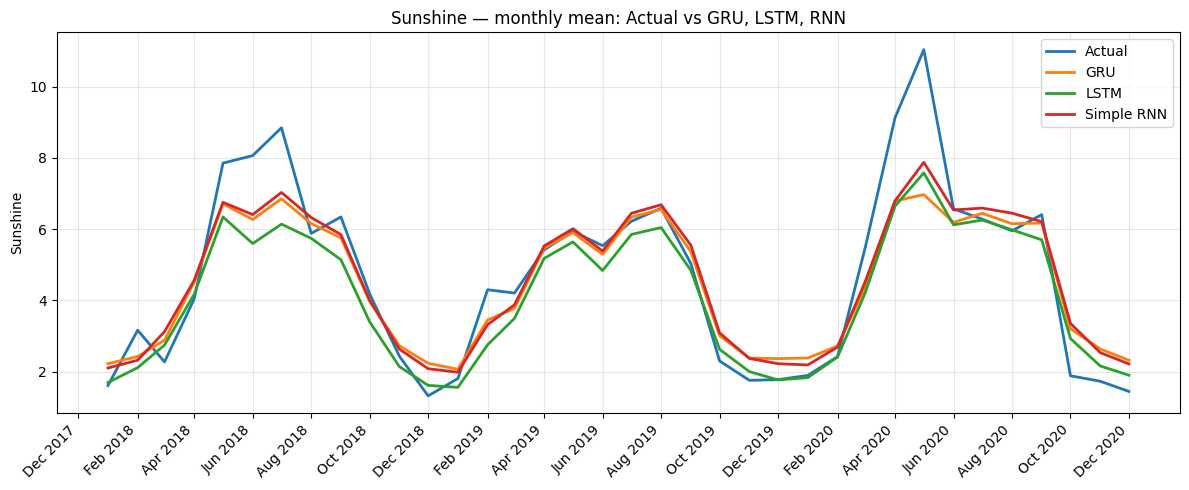

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

idx = pd.date_range("2018-01-01", periods=len(y_test), freq="D")

df = pd.DataFrame({
    "Actual": y_test,
    "GRU": y_pred_gru,
    "LSTM": y_pred_lstm,
    "RNN": y_pred_rnn
}, index=idx)

# Mesečni prosek
df_monthly = df.resample("MS").mean()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_monthly.index, df_monthly["Actual"], lw=2, label="Actual")
ax.plot(df_monthly.index, df_monthly["GRU"], lw=2, label="GRU")
ax.plot(df_monthly.index, df_monthly["LSTM"], lw=2, label="LSTM")
ax.plot(df_monthly.index, df_monthly["RNN"], lw=2, label="Simple RNN")

ax.set_title("Sunshine — monthly mean: Actual vs GRU, LSTM, RNN")
ax.set_ylabel("Sunshine")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()
